In [2]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [3]:
df_n_3070_8gb = pd.read_csv('/content/df_n_3070_8gb.csv', index_col='date')
df_n_2070_8gb = pd.read_csv('/content/df_n_2070_8gb.csv', index_col='date')
df_a_5700_8gb = pd.read_csv('/content/df_a_5700_8gb.csv', index_col='date')
df_a_580_8gb = pd.read_csv('/content/df_a_580_8gb.csv', index_col='date')
df_a_radeon_VII_16gb = pd.read_csv('/content/df_a_radeon_VII_16gb.csv', index_col='date')

In [4]:
df_n_3070_8gb.drop(['Unnamed: 0'], axis=1, inplace=True)
df_n_2070_8gb.drop(['Unnamed: 0'], axis=1, inplace=True)
df_a_5700_8gb.drop(['Unnamed: 0'], axis=1, inplace=True)
df_a_580_8gb.drop(['Unnamed: 0'], axis=1, inplace=True)
df_a_radeon_VII_16gb.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_n_3070_8gb = df_n_3070_8gb.rename(columns = {'y' : 'n_3070_8gb'})
df_n_2070_8gb = df_n_2070_8gb.rename(columns = {'y' : 'n_2070_8gb'})
df_a_5700_8gb = df_a_5700_8gb.rename(columns = {'y' : 'a_5700_8g'})
df_a_580_8gb = df_a_580_8gb.rename(columns = {'y' : 'a_580_8gb'})
df_a_radeon_VII_16gb = df_a_radeon_VII_16gb.rename(columns = {'y' : 'a_radeon_VII_16gb'})

Мерж датафреймов

In [6]:
df = df_n_3070_8gb.merge(df_n_2070_8gb, how='left', left_on=df_n_3070_8gb.index, right_on=df_n_2070_8gb.index)
df = df.merge(df_a_5700_8gb, how='left', left_on='key_0', right_on=df_a_5700_8gb.index)
df = df.merge(df_a_580_8gb, how='left', left_on='key_0', right_on=df_a_580_8gb.index)
df = df.merge(df_a_radeon_VII_16gb, how='left', left_on='key_0', right_on=df_a_radeon_VII_16gb.index)
df = df.rename(columns = {'key_0': 'date'})

df.index = df['date']
df.drop(['date'],axis=1, inplace=True)

In [12]:
df

,n_3070_8gb,n_2070_8gb,a_5700_8g,a_580_8gb,a_radeon_VII_16gb
date,,,,,
2020-11-03,760,500,330,156,785
2020-11-04,760,504,330,156,783
2020-11-05,765,508,331,157,783
2020-11-06,760,510,325,157,785
2020-11-07,760,510,330,156,780
...,...,...,...,...,...
2022-09-16,430,309,225,135,605
2022-09-17,430,307,225,134,605
2022-09-18,428,307,221,133,596


In [16]:
df.index = pd.to_datetime(df.index)

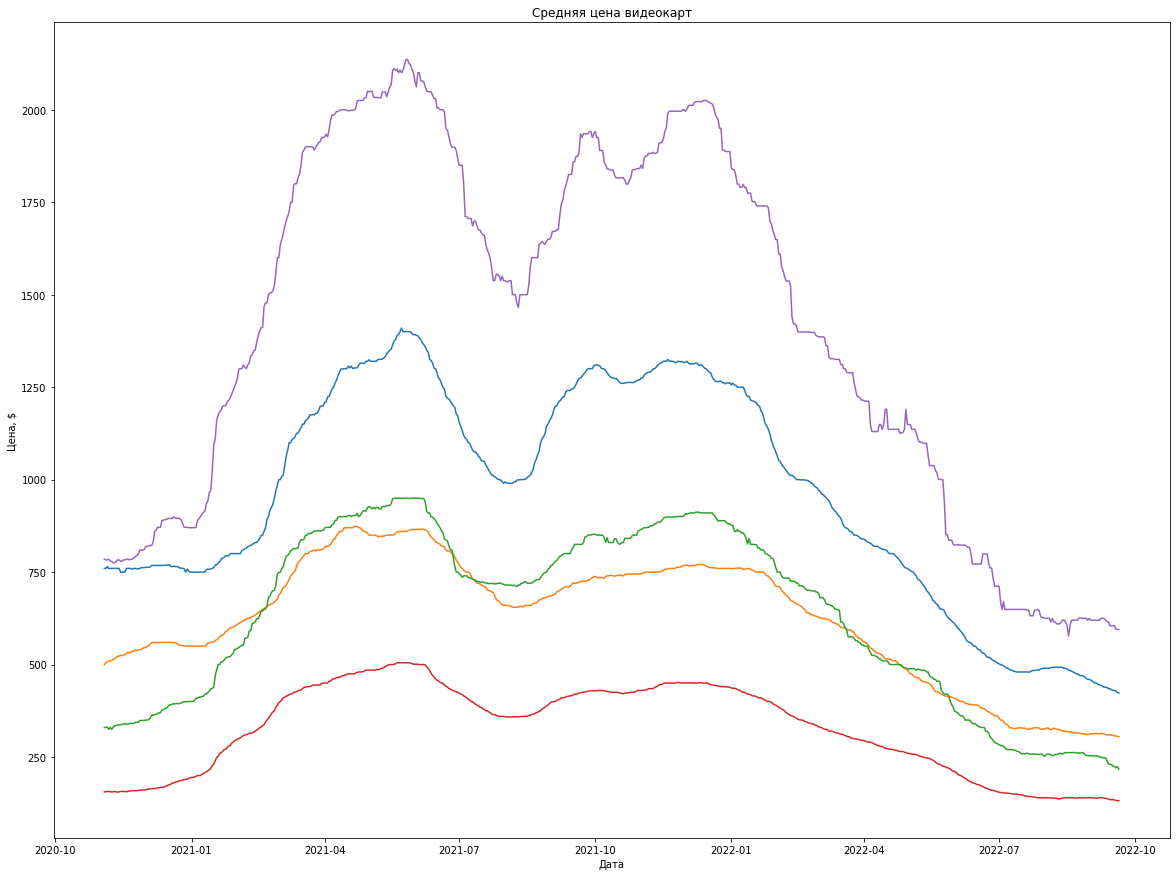

In [17]:
plt.figure(figsize=(20,15))
plt.title("Средняя цена видеокарт")
plt.xlabel("Дата")
plt.ylabel("Цена, $")
plt.plot(df)

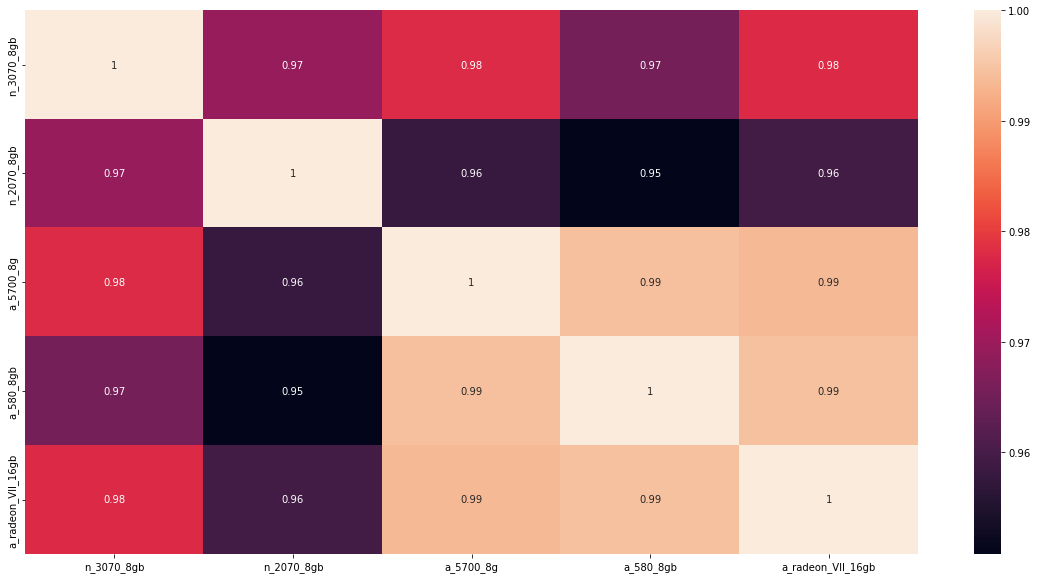

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(df.corr(), annot=True)

In [21]:
btc_usd = pd.read_csv('/content/BTC-USD (1).csv', index_col='Date')
eth_usd = pd.read_csv('/content/ETH-USD.csv', index_col='Date')

In [ ]:
btc_usd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,13950.300781,29869951617
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,14133.707031,35116364962
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,15579.848633,40856321439
2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,15565.880859,39837841971
2020-11-07,15565.880859,15737.095703,14423.203125,14833.753906,14833.753906,35024953706
...,...,...,...,...,...,...
2022-09-16,19704.005859,19870.628906,19400.076172,19772.583984,19772.583984,30123362273
2022-09-17,19777.033203,20162.531250,19777.033203,20127.576172,20127.576172,24957448100
2022-09-18,20127.234375,20127.234375,19387.492188,19419.505859,19419.505859,31254779144


In [23]:
btc_usd.index = pd.to_datetime(btc_usd.index)
eth_usd.index = pd.to_datetime(eth_usd.index)
df['BTC'] = btc_usd['Adj Close']
df['ETH'] = eth_usd['Adj Close']

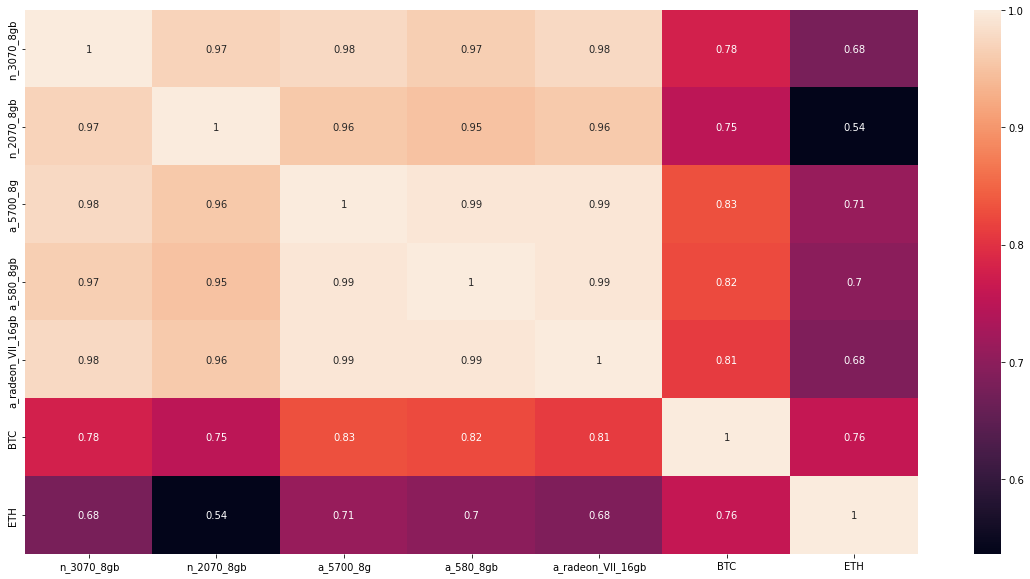

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))


sns.heatmap(df.corr(), annot=True)

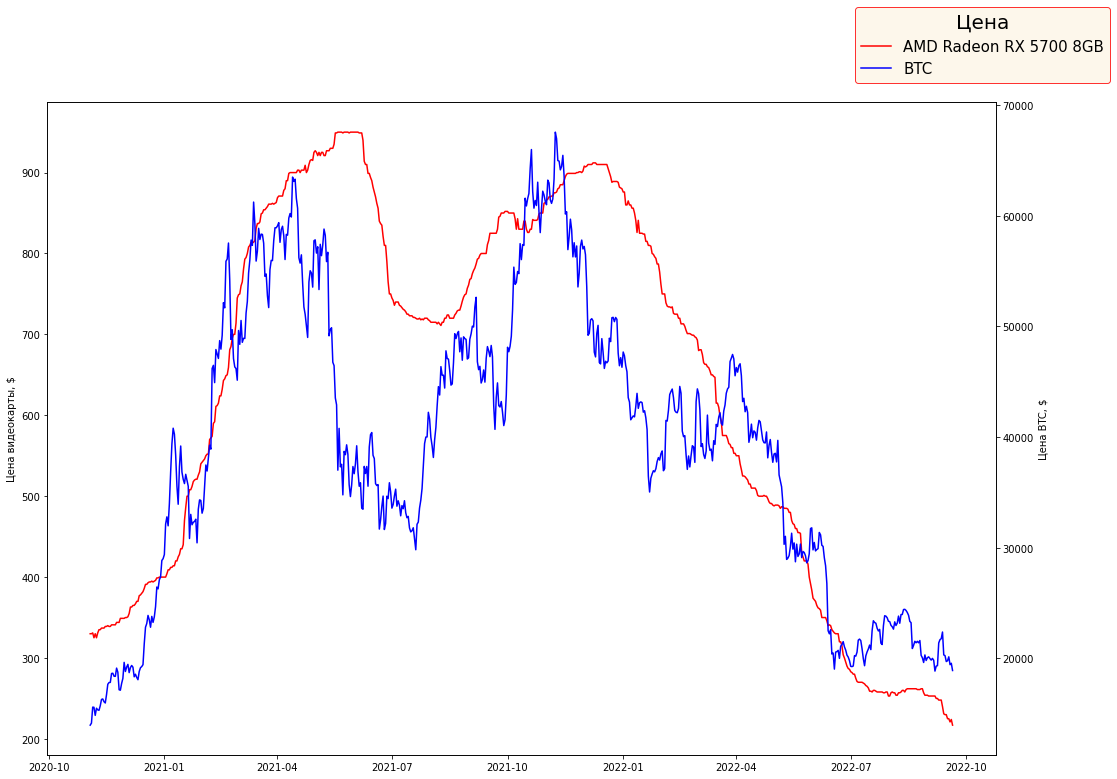

In [48]:

fig, ax = plt.subplots(figsize=(17, 12))
ax1 = ax.twinx()
ax.plot(df['a_5700_8g'],color='r', label='AMD Radeon RX 5700 8GB')
ax1.plot(df['BTC'],color='b', label='BTC')
ax.set_ylabel('Цена видеокарты, $')
ax1.set_ylabel('Цена BTC, $')

fig.legend(fontsize = 15,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          title = 'Цена',    #  заголовок
          title_fontsize = '20'    #  размер шрифта заголовка
         )